In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper
from pandas import DataFrame
from numpy import log
from numpy import sqrt

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [4]:
#df.set_index('date',inplace=True) ## making the month column as index

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [6]:
df.dtypes

date      object
price    float64
dtype: object

In [7]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 2)

In [10]:
df[df.duplicated()]

,date,price


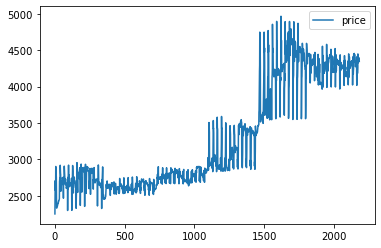

In [11]:
plt.rc('axes', labelsize=18)
df.plot()
plt.show()

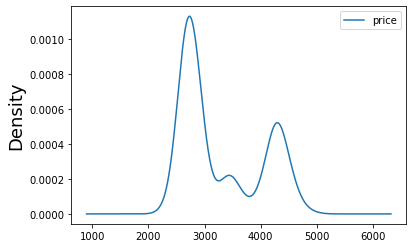

In [12]:
# create a density plot
df.plot(kind='kde')
plt.show()

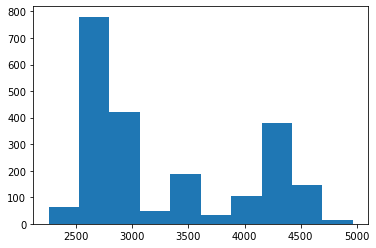

In [13]:
plt.hist(df["price"])
plt.show()

In [14]:
# newly added start:

In [15]:
df.dtypes

date      object
price    float64
dtype: object

In [16]:
# converting date from object to date
df["date"]=pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [17]:
# fetching year wise data:
gold=df

In [18]:
gold.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [19]:
gold["year"]=df["date"].dt.year
gold.head(2)

,date,price,year
0,2016-01-01,2252.6,2016
1,2016-01-02,2454.5,2016


In [20]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year
 0 2016-01-01  2252.60  2016
 1 2016-01-02  2454.50  2016
 2 2016-01-03  2708.10  2016
 3 2016-01-04  2577.80  2016
 4 2016-01-05  2597.75  2016,
           date        price  year
 361 2016-12-27  2469.300000  2016
 362 2016-12-28  2484.300000  2016
 363 2016-12-29  2498.100000  2016
 364 2016-12-30  2497.800000  2016
 365 2016-12-31  2534.033333  2016)

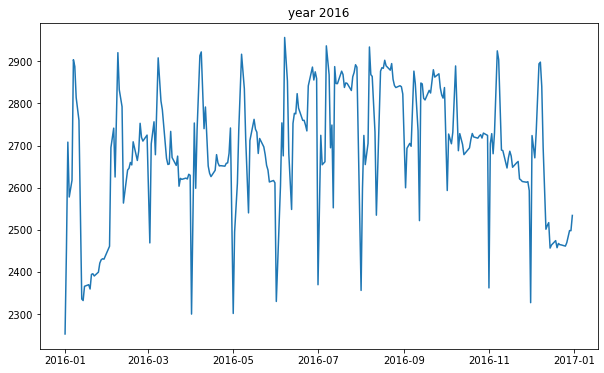

In [21]:
# plotting each year:
plt.figure(figsize=(10,6))
plt.plot(year_2016["date"],year_2016["price"])
plt.title("year 2016")
plt.show()


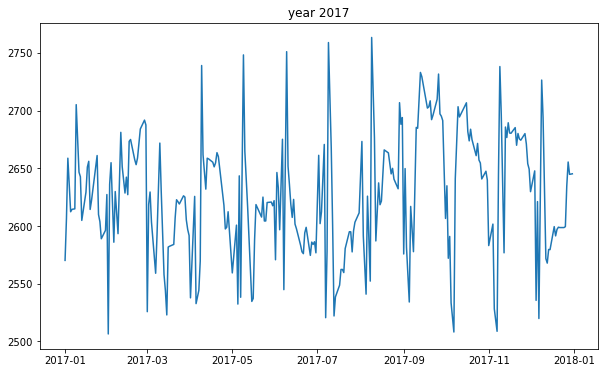

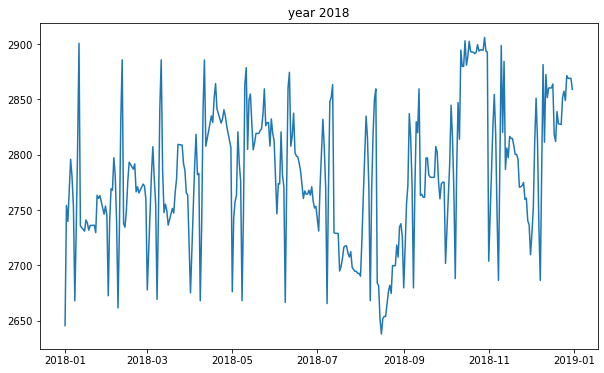

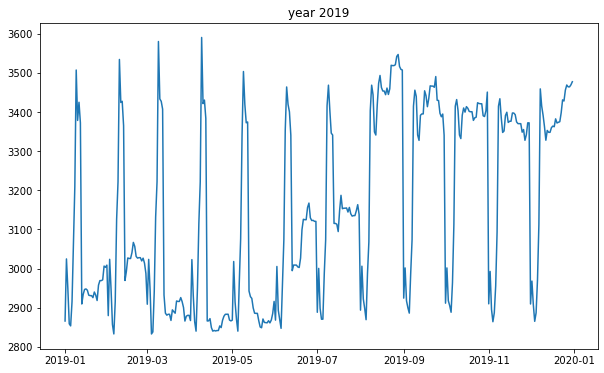

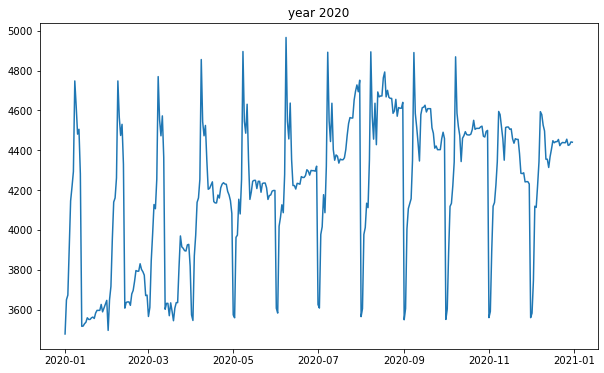

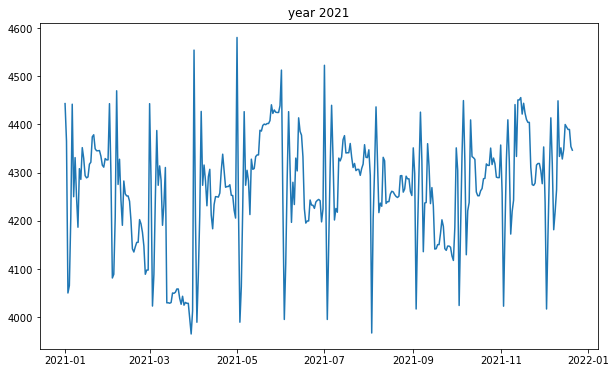

In [22]:
plt.figure(figsize=(10,6))
plt.plot(year_2017["date"],year_2017["price"])
plt.title("year 2017")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2018["date"],year_2018["price"])
plt.title("year 2018")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2019["date"],year_2019["price"])
plt.title("year 2019")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2020["date"],year_2020["price"])
plt.title("year 2020")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2021["date"],year_2021["price"])
plt.title("year 2021")
plt.show()

In [23]:
# fetching months:
gold["month"]=gold["date"].dt.month
gold.head(35)

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
5,2016-01-06,2617.700000,2016,1
6,2016-01-07,2903.800000,2016,1
7,2016-01-08,2887.800000,2016,1
8,2016-01-09,2813.800000,2016,1
9,2016-01-10,2786.800000,2016,1


In [24]:
gold

,date,price,year,month
0,2016-01-01,2252.60,2016,1
1,2016-01-02,2454.50,2016,1
2,2016-01-03,2708.10,2016,1
3,2016-01-04,2577.80,2016,1
4,2016-01-05,2597.75,2016,1
...,...,...,...,...
2177,2021-12-17,4394.40,2021,12
2178,2021-12-18,4389.50,2021,12
2179,2021-12-19,4389.50,2021,12
2180,2021-12-20,4354.10,2021,12


In [25]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year  month
 0 2016-01-01  2252.60  2016      1
 1 2016-01-02  2454.50  2016      1
 2 2016-01-03  2708.10  2016      1
 3 2016-01-04  2577.80  2016      1
 4 2016-01-05  2597.75  2016      1,
           date        price  year  month
 361 2016-12-27  2469.300000  2016     12
 362 2016-12-28  2484.300000  2016     12
 363 2016-12-29  2498.100000  2016     12
 364 2016-12-30  2497.800000  2016     12
 365 2016-12-31  2534.033333  2016     12)

In [26]:
year_2016

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
...,...,...,...,...
361,2016-12-27,2469.300000,2016,12
362,2016-12-28,2484.300000,2016,12
363,2016-12-29,2498.100000,2016,12
364,2016-12-30,2497.800000,2016,12


In [27]:
# group by price based on month:
# 2016
y_2016=year_2016.groupby(["month"]).agg({"price":np.mean})
y_2016


,price
month,
1,2495.832258
2,2688.703448
3,2682.854839
4,2677.790000
5,2677.650000
6,2745.596667
7,2779.582258
8,2792.240323
9,2792.705000


In [28]:
y_2016.reset_index(inplace=True)

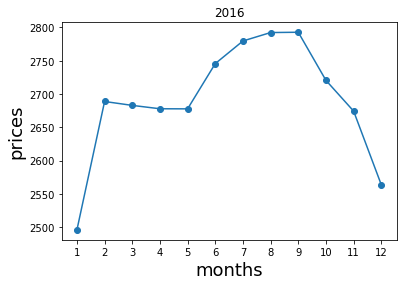

In [29]:
plt.scatter(y_2016["month"], y_2016["price"])
plt.plot(y_2016["month"], y_2016["price"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2016")
plt.xticks(y_2016["month"])
plt.show()

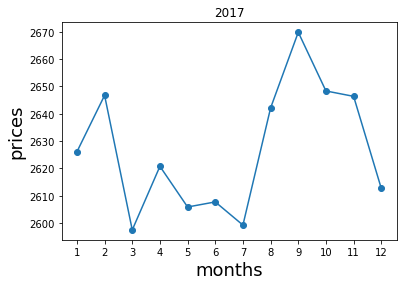

In [30]:
# 2017
y_2017=year_2017.groupby(["month"]).agg({"price":np.mean})
y_2017.reset_index(inplace=True)
plt.scatter(y_2017["month"], y_2017["price"])
plt.plot(y_2017["month"], y_2017["price"])
plt.xticks(y_2017["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2017")
plt.show()

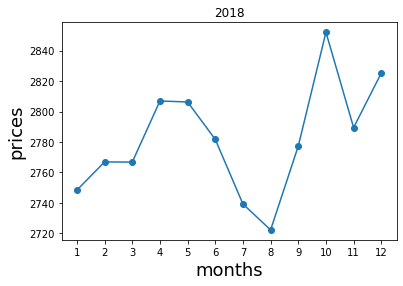

In [31]:
# 2018:
y_2018=year_2018.groupby(["month"]).agg({"price":np.mean})
y_2018.reset_index(inplace=True)
plt.scatter(y_2018["month"], y_2018["price"])
plt.plot(y_2018["month"], y_2018["price"])
plt.xticks(y_2018["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2018")
plt.show()

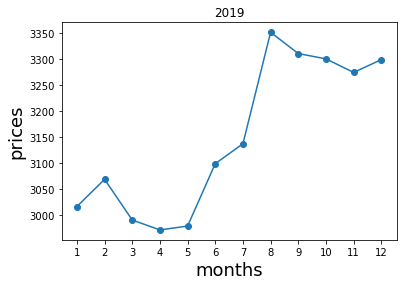

In [32]:
# 2019:
y_2019=year_2019.groupby(["month"]).agg({"price":np.mean})
y_2019.reset_index(inplace=True)
plt.scatter(y_2019["month"], y_2019["price"])
plt.plot(y_2019["month"], y_2019["price"])
plt.xticks(y_2019["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2019")
plt.show()

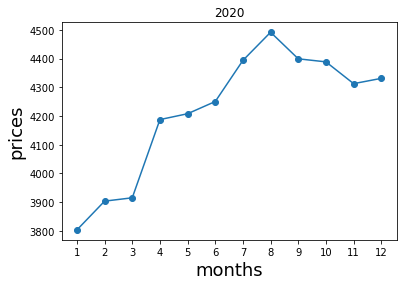

In [33]:
# 2020:
y_2020=year_2020.groupby(["month"]).agg({"price":np.mean})
y_2020.reset_index(inplace=True)
plt.scatter(y_2020["month"], y_2020["price"])
plt.plot(y_2020["month"], y_2020["price"])
plt.xticks(y_2020["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2020")
plt.show()

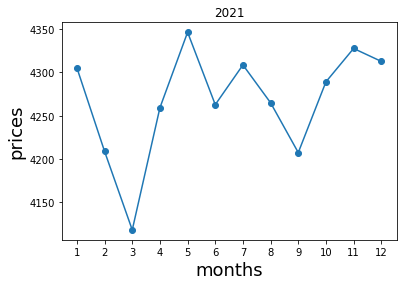

In [34]:
# 2021:y_2021.reset_index(inplace=True)
y_2021=year_2021.groupby(["month"]).agg({"price":np.mean})
y_2021.reset_index(inplace=True)
plt.scatter(y_2021["month"], y_2021["price"])
plt.plot(y_2021["month"], y_2021["price"])
plt.xticks(y_2021["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2021")
plt.show()

In [35]:
# newly added end.

In [36]:
df['price_sqrt'] = (df['price'])**(1/2)
df['price_log'] = log(df['price'])

In [37]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,1,47.461563,7.719840
1,2016-01-02,2454.50,2016,1,49.542911,7.805678
2,2016-01-03,2708.10,2016,1,52.039408,7.904003
3,2016-01-04,2577.80,2016,1,50.772040,7.854692
4,2016-01-05,2597.75,2016,1,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,66.290271,8.388086
2178,2021-12-18,4389.50,2021,12,66.253302,8.386971
2179,2021-12-19,4389.50,2021,12,66.253302,8.386971
2180,2021-12-20,4354.10,2021,12,65.985604,8.378873


<AxesSubplot:xlabel='date'>

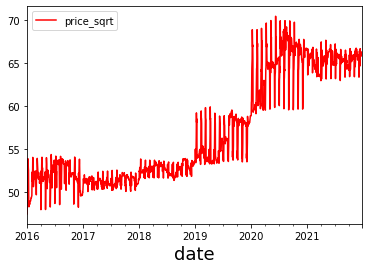

In [38]:
df.plot(x = 'date',y = 'price_sqrt',color = 'red')

<AxesSubplot:xlabel='date', ylabel='price_sqrt'>

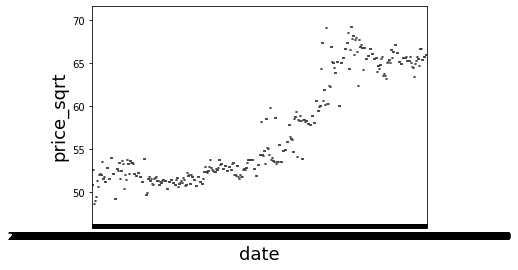

In [39]:
sns.boxplot(df.date,df.price_sqrt)

In [40]:
import numpy as np
DF=df.groupby(pd.DatetimeIndex(df["date"]).year).agg(np.mean)
DF

,price,year,month,price_sqrt,price_log
date,,,,,
2016,2690.614162,2016.0,6.513661,51.851549,7.896004
2017,2626.676484,2017.0,6.526027,51.248738,7.873289
2018,2781.938082,2018.0,6.526027,52.740980,7.930668
2019,3150.210685,2019.0,6.526027,56.087347,8.052419
2020,4216.378689,2020.0,6.513661,64.872209,8.342907
2021,4266.871549,2021.0,6.371831,65.315450,8.358277


In [41]:
DF.reset_index(inplace=True)

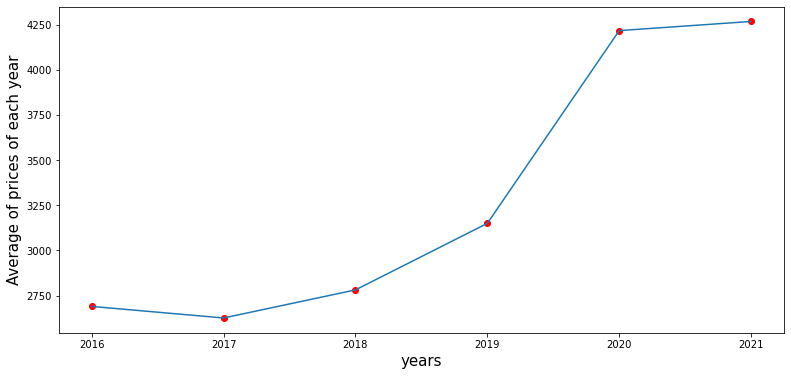

In [42]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(DF.date,DF.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each year")
plt.scatter(DF.date,DF.price,c='red')

In [43]:
import numpy as np
kf=df.groupby(pd.DatetimeIndex(df["date"]).month).agg(np.mean)
kf

,price,year,month,price_sqrt,price_log
date,,,,,
1,3165.796326,2018.500000,1.0,55.950626,8.038082
2,3214.831471,2018.494118,2.0,56.434510,8.057091
3,3178.425000,2018.500000,3.0,56.114496,8.045743
4,3253.865833,2018.500000,4.0,56.720211,8.065266
5,3270.410753,2018.500000,5.0,56.843587,8.068920
6,3291.177500,2018.500000,6.0,57.047911,8.076857
7,3326.265054,2018.500000,7.0,57.316817,8.085108
8,3377.567473,2018.500000,8.0,57.756848,8.100308
9,3359.573889,2018.500000,9.0,57.645105,8.097890


In [44]:
kf.reset_index(inplace=True)

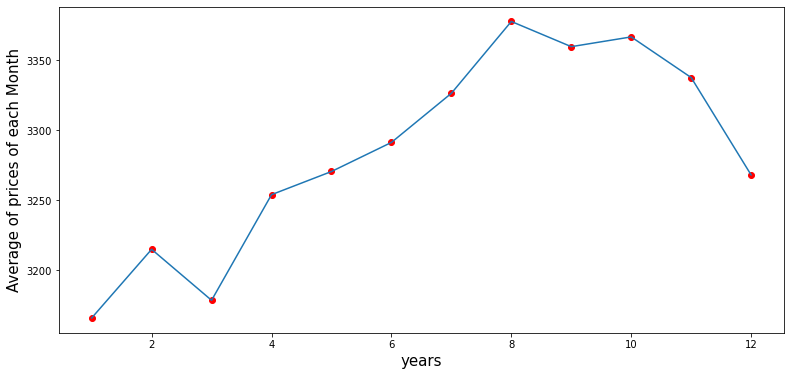

In [45]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(kf.date,kf.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each Month")
plt.scatter(kf.date,kf.price,c='red')

In [46]:
df["month"] = df.date.dt.strftime("%b") # month extraction
df["year"] = df.date.dt.strftime("%Y") # month extraction

In [47]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,66.290271,8.388086
2178,2021-12-18,4389.50,2021,Dec,66.253302,8.386971
2179,2021-12-19,4389.50,2021,Dec,66.253302,8.386971
2180,2021-12-20,4354.10,2021,Dec,65.985604,8.378873


In [48]:
months = pd.get_dummies(df['month']) 
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [50]:
Data = pd.concat([df,months],axis=1) 

In [51]:
Data.head()

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

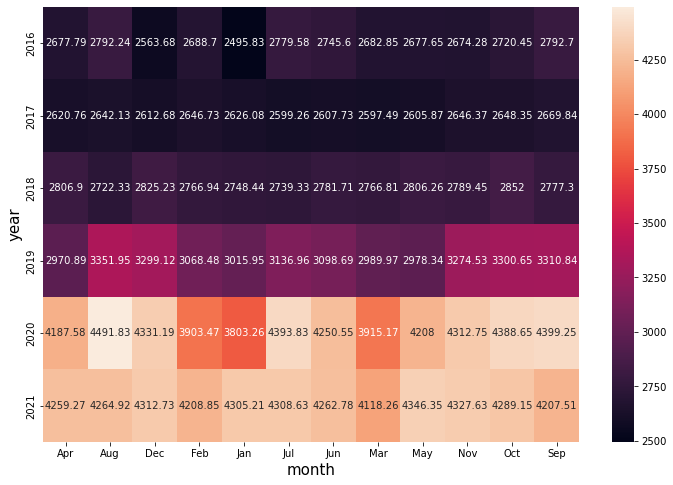

In [52]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Data,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='price'>

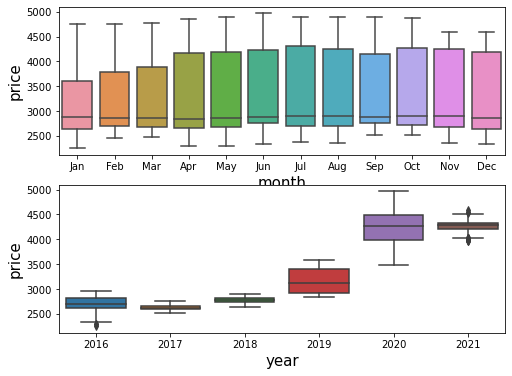

In [53]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="price",data= Data)
plt.subplot(212)
sns.boxplot(x="year",y="price",data=Data)

<AxesSubplot:xlabel='year', ylabel='price'>

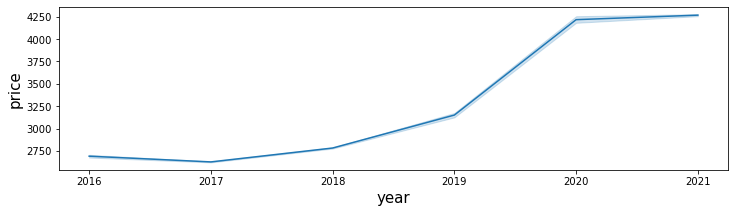

In [54]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="price",data=Data)

# model building:

## 1. Decision tree:

In [162]:
Data.head(5)

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


In [163]:
data1=Data[["date","year","month","price","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]].copy()
data1.head(1)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.6,1,0,0,0,0,0,0,0,0,0,0,0


In [164]:
data1.dtypes

date     datetime64[ns]
year             object
month            object
price           float64
Jan               uint8
Feb               uint8
Mar               uint8
Apr               uint8
May               uint8
Jun               uint8
Jul               uint8
Aug               uint8
Sep               uint8
Oct               uint8
Nov               uint8
Dec               uint8
dtype: object

# splitting data:

In [165]:
train=data1.head(2000)
test=data1.tail(182)

In [166]:
train.shape,test.shape

((2000, 16), (182, 16))

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [168]:
model=DecisionTreeRegressor( min_samples_split=5, max_features=3, max_depth=4,random_state=9)

In [169]:
x_train=train.drop(["price","month"],axis=1)
x_train.head(1)

,date,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
x_train.drop(["date"],axis=1,inplace=True)
x_train.head(1)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [171]:
x_train.dtypes

year    object
Jan      uint8
Feb      uint8
Mar      uint8
Apr      uint8
May      uint8
Jun      uint8
Jul      uint8
Aug      uint8
Sep      uint8
Oct      uint8
Nov      uint8
Dec      uint8
dtype: object

In [172]:
x_train["year"]=x_train["year"].astype(int)
x_train.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [173]:
y_train=train["price"]

In [174]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_split=5,
                      random_state=9)

In [175]:
train_p=model.predict(x_train)

In [176]:
train_rmse=sqrt(mse(y_train,train_p)).round(3)
train_rmse

592.269

In [177]:
# predicting:

In [178]:
test.head(5)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021-06-23,2021,Jun,4232.3,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021-06-24,2021,Jun,4225.8,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021-06-25,2021,Jun,4238.9,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,2021,Jun,4242.3,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021-06-27,2021,Jun,4244.4,0,0,0,0,0,1,0,0,0,0,0,0


In [179]:
x_test=test.drop(["price","month"],axis=1)
x_test.head(6)

,date,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021-06-23,2021,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021-06-24,2021,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021-06-25,2021,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,2021,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021-06-27,2021,0,0,0,0,0,1,0,0,0,0,0,0
2005,2021-06-28,2021,0,0,0,0,0,1,0,0,0,0,0,0


In [180]:
x_test.drop(["date"],axis=1,inplace=True)

In [181]:
x_test.dtypes

year    object
Jan      uint8
Feb      uint8
Mar      uint8
Apr      uint8
May      uint8
Jun      uint8
Jul      uint8
Aug      uint8
Sep      uint8
Oct      uint8
Nov      uint8
Dec      uint8
dtype: object

In [182]:
x_test["year"]=x_test["year"].astype(int)
x_test.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [183]:
x_test.head(5)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021,0,0,0,0,0,1,0,0,0,0,0,0


In [184]:
predicted=model.predict(x_test)
predicted

array([4274.34545455, 4274.34545455, 4274.34545455, 4274.34545455,
       4274.34545455, 4274.34545455, 4274.34545455, 4274.34545455,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3175.10241875,
       3175.10241875, 3175.10241875, 3175.10241875, 3200.09709677,
       3200.09709677, 3200.09709677, 3200.09709677, 3200.09709677,
       3200.09709677, 3200.09709677, 3200.09709677, 3200.09709677,
       3200.09709677, 3200.09709677, 3200.09709677, 3200.09709677,
       3200.09709677, 3200.09709677, 3200.09709677, 3200.09709677,
       3200.09709677, 3200.09709677, 3200.09709677, 3200.09709

In [185]:
forecast=pd.DataFrame({"prediction":predicted})
forecast.head(5)

,prediction
0,4274.345455
1,4274.345455
2,4274.345455
3,4274.345455
4,4274.345455


In [186]:
# set indexing starting from 2000
forecast = forecast.set_index(x_test.index)
forecast.head(5)

,prediction
2000,4274.345455
2001,4274.345455
2002,4274.345455
2003,4274.345455
2004,4274.345455


In [187]:
y_test=test["price"]

In [188]:
y_test=pd.DataFrame({'actual price':y_test})

In [189]:
y_test.head(5)

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4


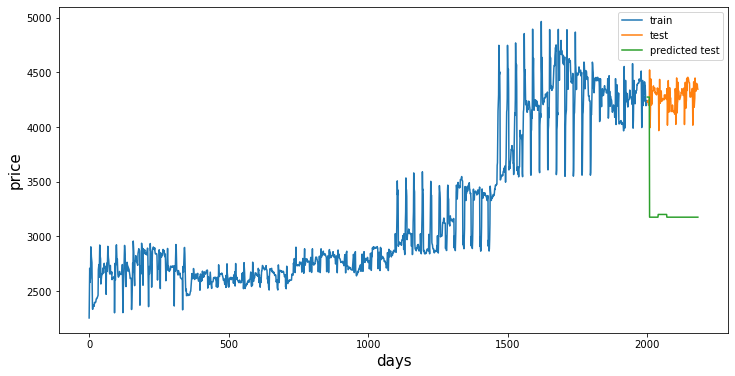

In [190]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
forecast["prediction"].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

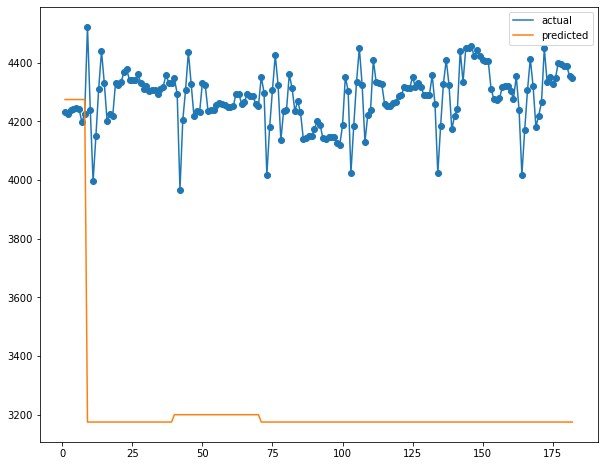

In [200]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(y_test)+1),y_test)
plt.plot(np.arange(1,len(y_test)+1),y_test)

#plt.scatter(np.arange(1,len(y_test)+1),forecast)
plt.plot(np.arange(1,len(y_test)+1),forecast)
plt.legend(["actual","predicted"])

In [201]:
y_test

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4
...,...
2177,4394.4
2178,4389.5
2179,4389.5
2180,4354.1


In [202]:
forecast

,prediction
2000,4274.345455
2001,4274.345455
2002,4274.345455
2003,4274.345455
2004,4274.345455
...,...
2177,3175.102419
2178,3175.102419
2179,3175.102419
2180,3175.102419


In [203]:
d=pd.DataFrame({"actual":y_test["actual price"],"forecasted":forecast["prediction"]})
d

,actual,forecasted
2000,4232.3,4274.345455
2001,4225.8,4274.345455
2002,4238.9,4274.345455
2003,4242.3,4274.345455
2004,4244.4,4274.345455
...,...,...
2177,4394.4,3175.102419
2178,4389.5,3175.102419
2179,4389.5,3175.102419
2180,4354.1,3175.102419


In [204]:
# model validation:

In [205]:
mse(y_test,forecast)

1174604.068654162

In [206]:
rmse=sqrt(mse(y_test,forecast))
rmse

1083.7915245351212

In [207]:
test_rmse=sqrt(mse(y_test,forecast)).round(3)
test_rmse

1083.792

In [208]:
a=pd.DataFrame({"decision tree":["training","testing"], "rmse":[train_rmse,test_rmse]})
a

,decision tree,rmse
0,training,592.269
1,testing,1083.792


## hyperparameters tuning:

In [209]:
# max features for each tree:
Train=[]
Test=[]
for i in range(1,14):
    model=DecisionTreeRegressor(min_samples_split=5, max_features=i,max_depth=4,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))


In [210]:
data=pd.DataFrame({"train rmse":Train,"test rmse":Test})
data

,train rmse,test rmse
0,612.050440,880.517405
1,591.195229,1098.440496
2,592.269362,1083.791525
3,248.443200,139.823410
4,251.208899,97.479837
5,252.799470,114.338651
6,191.276156,93.967194
7,190.953989,94.085254
8,190.953989,94.085254
9,188.417668,133.273604


In [211]:
len(Test)

13

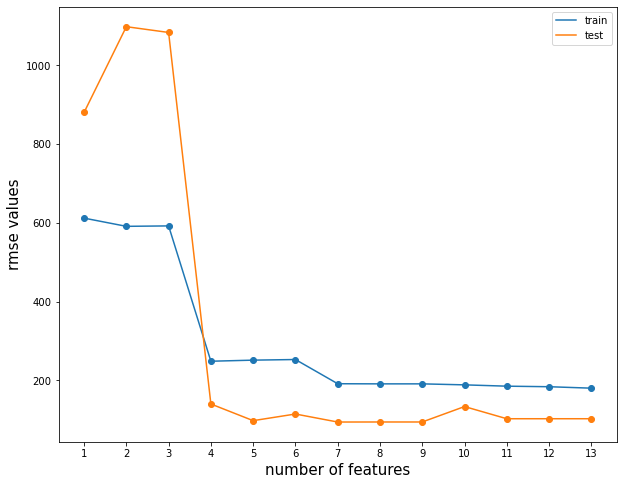

In [212]:
# through visualization:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(Test)+1),data["train rmse"])
plt.plot(np.arange(1,len(Test)+1),data["train rmse"])

plt.scatter(np.arange(1,len(Test)+1),data["test rmse"])
plt.plot(np.arange(1,len(Test)+1),data["test rmse"])
plt.xlabel("number of features")
plt.ylabel("rmse values")
plt.xticks(np.arange(1,len(Test)+1))
plt.legend(["train","test"])
plt.show()

# best num of features is 7

In [213]:
# minimum samples split:
Train=[]
Test=[]
for i in range(2,21):
    model=DecisionTreeRegressor(min_samples_split=i,max_features=7,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))


In [214]:
data2=pd.DataFrame({"train rmse":Train,"test rmse":Test})
data2

,train rmse,test rmse
0,162.30339,158.357706
1,162.30339,158.357706
2,162.30339,158.357706
3,162.30339,158.357706
4,162.30339,158.357706
5,162.30339,158.357706
6,162.30339,158.357706
7,162.30339,158.357706
8,162.30339,158.357706
9,162.30339,158.357706


In [215]:
len(Test)

19

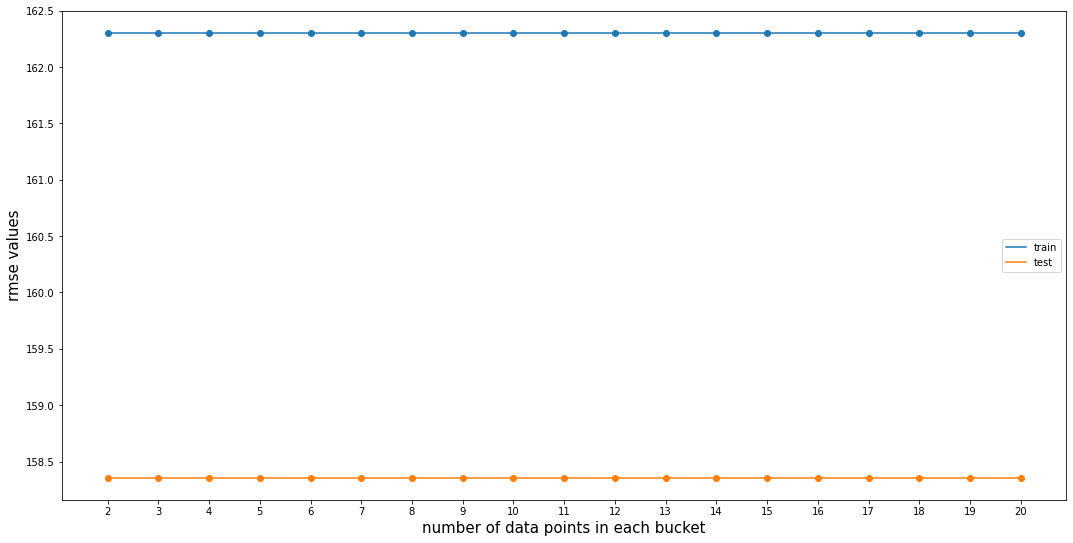

In [216]:
# through graph:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(np.arange(2,len(Test)+2),data2["train rmse"])
plt.plot(np.arange(2,len(Test)+2),data2["train rmse"])

plt.scatter(np.arange(2,len(Test)+2),data2["test rmse"])
plt.plot(np.arange(2,len(Test)+2),data2["test rmse"])
plt.xticks(np.arange(2,len(Test)+2))
plt.xlabel("number of data points in each bucket")
plt.ylabel("rmse values")
plt.legend(["train","test"])
plt.show()

# lets take 2


In [217]:
# tree depth:
Train=[]
Test=[]
for i in range(1,15):
    model=DecisionTreeRegressor(min_samples_split=2,max_features=7,max_depth=i,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))

In [218]:
data3=pd.DataFrame({"train rmse":Train,"test rmse":Test})
data3

,train rmse,test rmse
0,681.579625,1099.546263
1,265.566416,111.547733
2,201.722820,98.494426
3,191.276156,93.967194
4,187.106188,133.833038
5,175.163636,134.844327
6,169.575458,141.258432
7,167.257827,148.898672
8,173.510160,159.730857
9,162.917267,157.868178


In [219]:
len(Test)

14

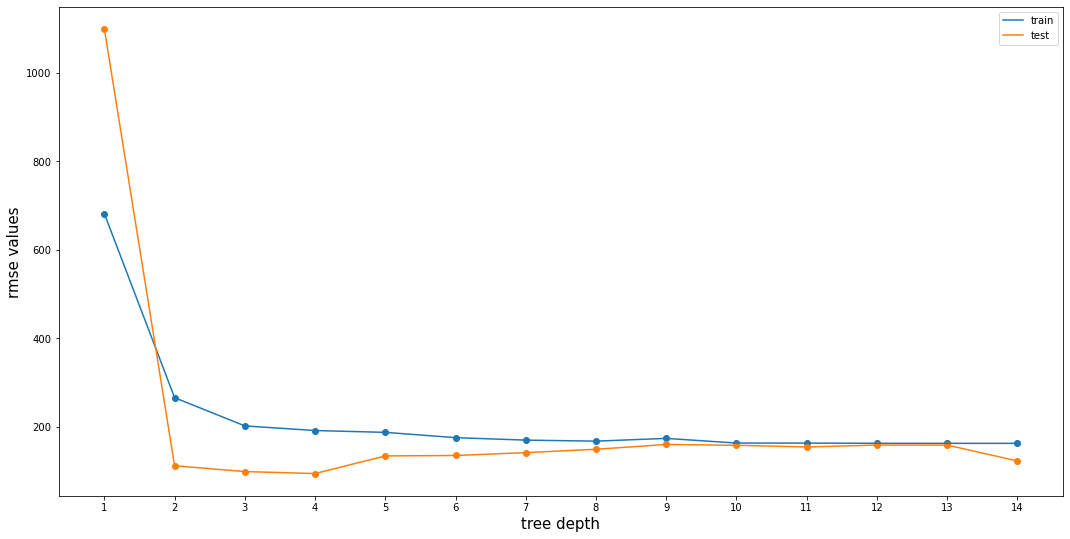

In [220]:
# through graph:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(np.arange(1,len(Test)+1),data3["train rmse"])
plt.plot(np.arange(1,len(Test)+1),data3["train rmse"])

plt.scatter(np.arange(1,len(Test)+1),data3["test rmse"])
plt.plot(np.arange(1,len(Test)+1),data3["test rmse"])
plt.xticks(np.arange(1,len(Test)+1))
plt.xlabel("tree depth")
plt.ylabel("rmse values")
plt.legend(["train","test"])
plt.show()

# max depth 4 is best

## model building again

In [244]:
model=DecisionTreeRegressor(min_samples_split=2,max_features=7,max_depth=4,random_state=9)

In [245]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=7, random_state=9)

In [246]:
train_pred=model.predict(x_train)
train_pred

array([2660.25784753, 2660.25784753, 2660.25784753, ..., 4283.38240223,
       4283.38240223, 4283.38240223])

In [247]:
train_rmse=sqrt(mse(y_train,train_pred)).round(3)
train_rmse

191.276

In [248]:
predicted=model.predict(x_test)
predicted=predicted.round(2)

In [249]:
forecast=pd.DataFrame({"prediction":predicted})
forecast.head(5)

,prediction
0,4283.38
1,4283.38
2,4283.38
3,4283.38
4,4283.38


In [250]:
forecast = forecast.set_index(x_test.index)
forecast.head(5)

,prediction
2000,4283.38
2001,4283.38
2002,4283.38
2003,4283.38
2004,4283.38


In [268]:
xx=pd.DataFrame({"actual price":test["price"],"predicted price":predicted})
print(xx.head(40))

      actual price  predicted price
2000        4232.3          4283.38
2001        4225.8          4283.38
2002        4238.9          4283.38
2003        4242.3          4283.38
2004        4244.4          4283.38
2005        4241.7          4283.38
2006        4197.8          4283.38
2007        4224.7          4283.38
2008        4522.6          4283.38
2009        4238.8          4283.38
2010        3995.4          4283.38
2011        4149.0          4283.38
2012        4310.8          4283.38
2013        4439.6          4283.38
2014        4330.3          4283.38
2015        4201.7          4283.38
2016        4225.6          4283.38
2017        4217.8          4283.38
2018        4330.1          4283.38
2019        4324.3          4283.38
2020        4332.6          4283.38
2021        4368.3          4283.38
2022        4376.7          4283.38
2023        4340.7          4283.38
2024        4341.2          4283.38
2025        4341.2          4283.38
2026        4360.4          

In [252]:
y_test=test["price"]

In [253]:
y_test=pd.DataFrame({'actual price':y_test})

In [254]:
y_test.head(5)

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4


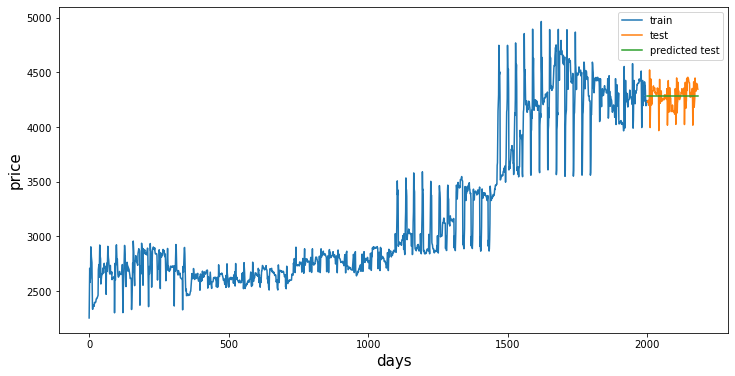

In [255]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
forecast["prediction"].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

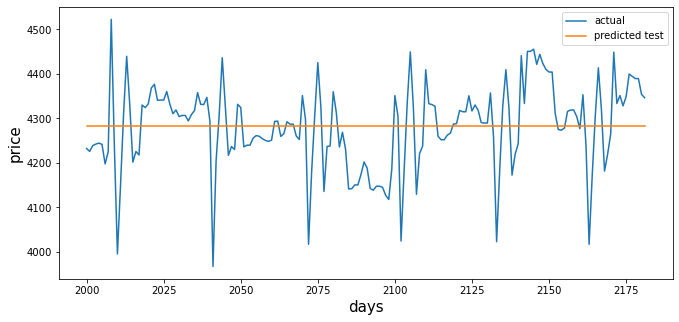

In [256]:
test["price"].plot(legend=True, label="actual",figsize=(11,5))
forecast["prediction"].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

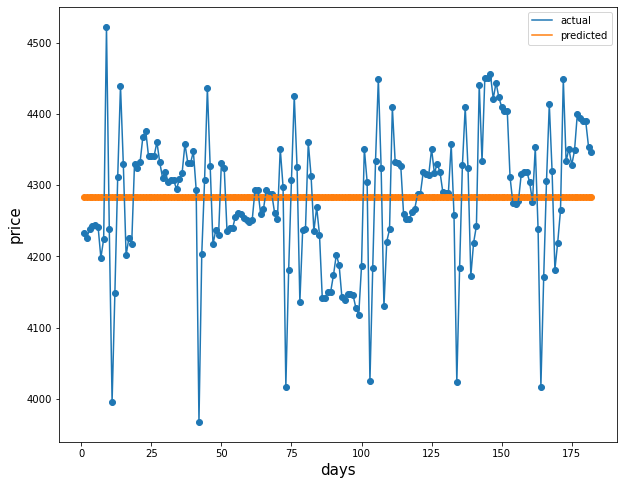

In [273]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(y_test)+1),y_test)
plt.plot(np.arange(1,len(y_test)+1),y_test)

plt.scatter(np.arange(1,len(y_test)+1),forecast)
plt.plot(np.arange(1,len(y_test)+1),forecast)
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual","predicted"])

In [258]:
mse(y_test,forecast)

8829.8240043956

In [262]:
test_rmse=np.sqrt(mse(y_test,forecast)).round(3)
test_rmse

93.967

In [263]:
#Evaluation Metric MAPE
def MAPE(org,pred):
    temp = np.abs((org-pred)/org)*100
    return np.mean(temp)

In [264]:
MAPE(test["price"],predicted.round(2))

1.6938590830784066

In [265]:
b=pd.DataFrame({"random forest":["training","testing"], "rmse":[train_rmse,test_rmse]})
b
 

,random forest,rmse
0,training,191.276
1,testing,93.967


In [266]:
# before tuning:
a

,decision tree,rmse
0,training,592.269
1,testing,1083.792


In [267]:
# after tuning:
b

,random forest,rmse
0,training,191.276
1,testing,93.967


## Final model

In [125]:
data1.head(5)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2016,Jan,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2016,Jan,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2016,Jan,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2016,Jan,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [126]:
df11=data1.drop(["date","month"],axis=1)

In [127]:
df11.head(5)

,year,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [128]:
df11.dtypes

year      object
price    float64
Jan        uint8
Feb        uint8
Mar        uint8
Apr        uint8
May        uint8
Jun        uint8
Jul        uint8
Aug        uint8
Sep        uint8
Oct        uint8
Nov        uint8
Dec        uint8
dtype: object

In [129]:
df11["year"]=df11["year"].astype(int)
x_train.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [130]:
x_train=df11.drop("price",axis=1)
x_train.head(5)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [131]:
y_train=df11["price"]
y_train

0       2252.60
1       2454.50
2       2708.10
3       2577.80
4       2597.75
         ...   
2177    4394.40
2178    4389.50
2179    4389.50
2180    4354.10
2181    4346.50
Name: price, Length: 2182, dtype: float64

In [132]:
model=DecisionTreeRegressor(min_samples_split=2,max_features=7,max_depth=4,random_state=9)

In [133]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=7, random_state=9)

In [134]:
df11.head(5)

,year,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [135]:
df.tail(1)

,date,price,year,month,price_sqrt,price_log
2181,2021-12-21,4346.5,2021,Dec,65.927991,8.377126


In [136]:
year=[2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,
      2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,
      2022,2022,2022,2022,2022,2022,2022,2022,2022,2022]

In [137]:
Jan=[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

Feb=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Mar=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Apr=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

May=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Jun=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Jul=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Aug=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Sep=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Oct=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Nov=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Dec=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [138]:
future=pd.DataFrame({"year":year,"Jan":Jan,"Feb":Feb,"Mar":Mar,"Apr":Apr,"May":May,"Jun":Jun,"Jul":Jul,"Aug":Aug,"Sep":Sep,
                     "Oct":Oct,"Nov":Nov,"Dec":Dec})

In [139]:
# forecasting:
forecast=model.predict(future)
forecast

array([3292.03184441, 3292.03184441, 3292.03184441, 3292.03184441,
       3292.03184441, 3292.03184441, 3292.03184441, 3292.03184441,
       3292.03184441, 3292.03184441, 4305.20967742, 4305.20967742,
       4305.20967742, 4305.20967742, 4305.20967742, 4305.20967742,
       4305.20967742, 4305.20967742, 4305.20967742, 4305.20967742,
       4305.20967742, 4305.20967742, 4305.20967742, 4305.20967742,
       4305.20967742, 4305.20967742, 4305.20967742, 4305.20967742,
       4305.20967742, 4305.20967742])

In [140]:
forecast=pd.DataFrame(forecast)
forecast.head(2)

,0
0,3292.031844
1,3292.031844


In [141]:
forecast.rename(columns={0:"price"},inplace=True)
forecast.head(1)

,price
0,3292.031844


In [142]:
# set indexing starting from 2182
index=list(range(2182,2212))
#index

In [143]:
forecast = forecast.set_index([index])
forecast.head(5)

,price
2182,3292.031844
2183,3292.031844
2184,3292.031844
2185,3292.031844
2186,3292.031844


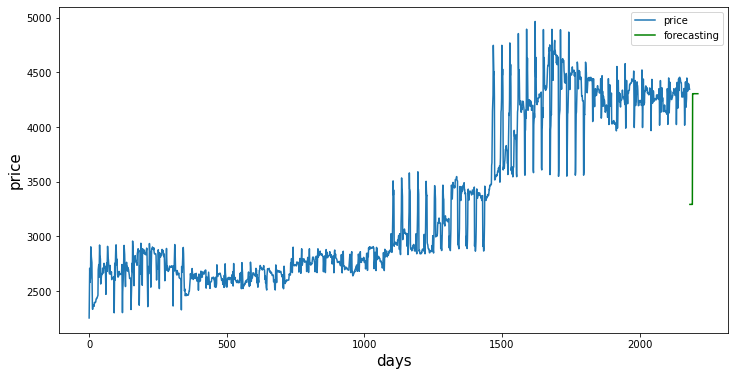

In [147]:
import matplotlib.pyplot as plt
df11["price"].plot(legend=True, label="price",figsize=(12,6))
forecast["price"].plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

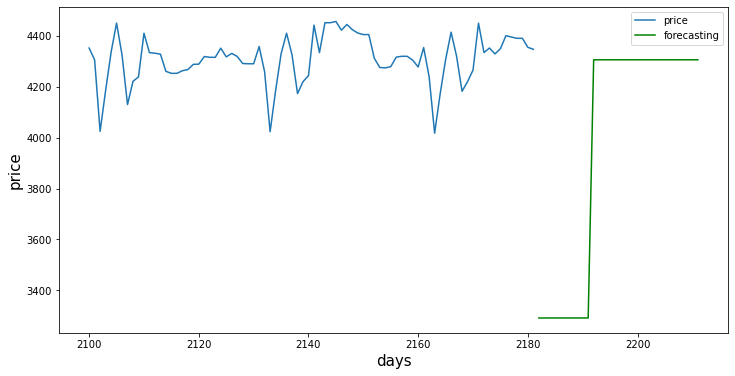

In [146]:
import matplotlib.pyplot as plt
df11["price"][2100:].plot(legend=True, label="price",figsize=(12,6))
forecast["price"].plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
#plt.xticks(np.arange(2000,2187))
plt.show()